# **Project Name**    - Online Retail Customer Segmentation using Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** VISHNU S
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

This project delves into the critical domain of Online Retail Customer Segmentation, a key driver for success in today’s competitive business environment. By segmenting customers based on their unique traits and behaviors, businesses can uncover actionable insights and create personalized strategies that address the specific demands of each group.

The primary focus of this project was to analyze a comprehensive transactional dataset from a online retail company specializing in all-occasion gift products. Covering the period between December 1, 2010, and December 9, 2011, the dataset included transactions made by both individual customers and wholesalers, offering a rich foundation for analysis.

To achieve meaningful customer segmentation, I employed advanced clustering techniques, including K-Means, Agglomerative Hierarchical Clustering. These algorithms enabled the identification of clear and distinct customer groups, providing valuable insights into their purchasing patterns.

The project encompassed several critical stages: data inspection to understand the dataset's structure, exploratory data analysis (EDA) to uncover trends and anomalies, data preprocessing to ensure quality, and the implementation of clustering models. These steps not only revealed distinct customer segments but also provided a deeper understanding of customer behavior, forming the basis for actionable business strategies.

Through this work, I demonstrated expertise in customer segmentation, data analysis, and the practical application of clustering algorithms. The insights derived can empower businesses to refine their marketing efforts, enhance customer satisfaction, and drive sustainable growth in the competitive online retail sector. Additionally, this project highlighted the value of combining domain knowledge with data science techniques to address real-world business challenges effectively.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**


The goal of this project is to design a customer segmentation model tailored to an online retail business, enabling the discovery of valuable insights about the customer base. The ultimate aim is to implement focused strategies that enhance customer satisfaction, boost sales, and streamline marketing efforts. By examining transactional data alongside customer attributes such as purchasing patterns, demographic details, and geographic distribution, this project seeks to identify meaningful customer segments.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
import missingno as msno
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
online_retail_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project Datasets/Copy of Online Retail.xlsx - Online Retail.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [ ]:
# Dataset First Look

online_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
# Display the first 5 rows of the dataset
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print("ROWS:",online_retail_df.shape[0])
print("COLUMNS:",online_retail_df.shape[1])


ROWS: 541909
COLUMNS: 8


In [ ]:
#optional way

rows, columns = online_retail_df.shape
print(f'The dataset contains', rows, 'rows and', columns, 'columns')

The dataset contains 541909 rows and 8 columns


### Dataset Information

In [ ]:
# Dataset Info
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
online_retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
for col in online_retail_df.columns.to_list():
 print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [ ]:
online_retail_df['Description'].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
...,...
Missing,1
historic computer difference?....se,1
DUSTY PINK CHRISTMAS TREE 30CM,1


#### Duplicate Values

In [ ]:
#dataset.duplicated() - displays one column of T/F where True is duplicate value

#dataset[dataset.duplicated()] - displays all duplicate rows in each columns

#len(dataset[dataset.duplicated()]) - displays length of the duplicate rows

In [ ]:
# Dataset Duplicate Value Count

duplicount= len(online_retail_df[online_retail_df.duplicated()])
print(f'The total number of duplicated values in the dataset: {duplicount}')

The total number of duplicated values in the dataset: 5268


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

#Finding number of null values

online_retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
135080/541909 *100

24.926694334288598

In [ ]:
1454/541909 *100

0.2683107311375157

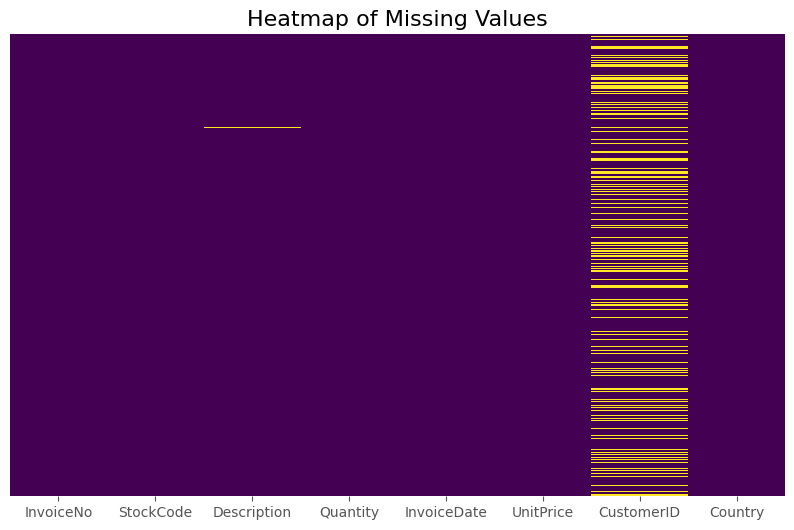

In [ ]:
# Visualizing the missing values

# Plot heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(online_retail_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Add a title for clarity
plt.title("Heatmap of Missing Values", fontsize=16)
plt.show()


### What did you know about your dataset?

Answer Here

The dataset is of transnational dataset which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The company mainly sells WHITE HANGING HEART T-LIGHT HOLDER.

Many customers of the company are wholesalers.

The dataset contains 541909 rows and 8 columns.

There are 2 columns of datatype float64, 5 columns of datatype object and 1 column of datatype int64.

The total number of duplicated values in the dataset: 5268

Missing Data Percentage of CustomerID - 24.93%
Missing Data Percentage of Description - 0.27%

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

online_retail_df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe

online_retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Answer Here

InvoiceNo: A unique identifier for each transaction or invoice. Represents a single order made by a customer.

StockCode: A unique identifier or code assigned to each product in the inventory.

Description: A textual description of the product being purchased.

Quantity: The number of units of the product purchased in the transaction.

InvoiceDate: The date and time when the transaction occurred. Format: MM/DD/YY HH:MM.

UnitPrice: The price of a single unit of the product (in the local currency).

CustomerID: A unique identifier for the customer making the purchase.

Country: The country where the customer resides or where the transaction occurred.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

#Finding unique values

online_retail_df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [ ]:
#Printing No. of unique values in each column and their Unique values

for i in online_retail_df.columns:
  print("i value-",i)
  print("No. of unique values in",i,"is :",online_retail_df[i].nunique())
  print(f"Unique values in '{i}' are {online_retail_df[i].unique()}\n")

i value- InvoiceNo
No. of unique values in InvoiceNo is : 25900
Unique values in 'InvoiceNo' are ['536365' '536366' '536367' ... '581585' '581586' '581587']

i value- StockCode
No. of unique values in StockCode is : 4070
Unique values in 'StockCode' are ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']

i value- Description
No. of unique values in Description is : 4223
Unique values in 'Description' are ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

i value- Quantity
No. of unique values in Quantity is : 722
Unique values in 'Quantity' are [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# converting into proper date format
online_retail_df["InvoiceDate"]=pd.to_datetime(online_retail_df["InvoiceDate"])

online_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### What all manipulations have you done and insights you found?

Changed the Data type of InvoiceDate from object to datetime64[ns]

In [ ]:
online_retail_df['InvoiceNo'].value_counts()

,count
InvoiceNo,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
554023,1
554022,1
554021,1


In [ ]:
# Remove all missing and duplicate values in the CustomerID column
temp_df = temp_df.dropna(subset = ['CustomerID'], how = 'all').drop_duplicates()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Top Selling products**

In [ ]:
#temp_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.contains('C')] is used to filter a pandas DataFrame by excluding rows where the InvoiceNo column contains the letter 'C'.

# Creat a dataframe without cancelled ordered
temp_df = online_retail_df[~online_retail_df['InvoiceNo'].astype(str).str.contains('C')]

In [ ]:
temp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
product = temp_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
product

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48478
WHITE HANGING HEART T-LIGHT HOLDER,37895
POPCORN HOLDER,36761
ASSORTED COLOUR BIRD ORNAMENT,36461
PACK OF 72 RETROSPOT CAKE CASES,36419
RABBIT NIGHT LIGHT,30788


In [ ]:
# Create the dataframe containing the top 10 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product

,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48478
4,WHITE HANGING HEART T-LIGHT HOLDER,37895
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633


#### Chart - 1

Text(0.5, 1.0, 'Top 10 products')

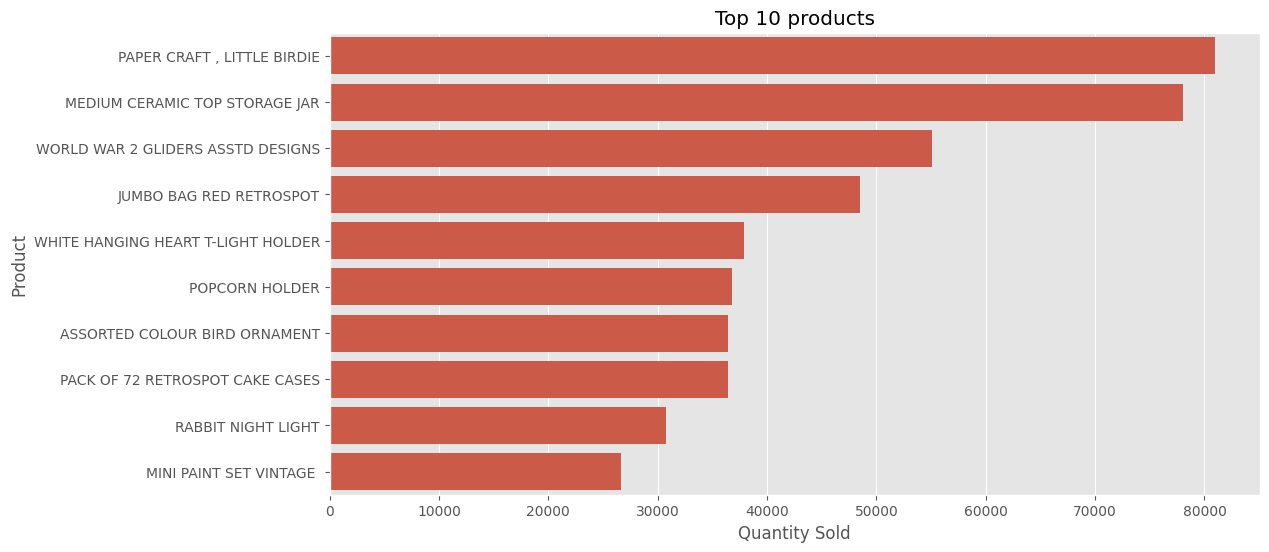

In [ ]:
# Chart - 1 visualization code

# top 10 product in terms of description
plt.figure(figsize=(12,6))

sns.barplot(x=top_product['Quantity Sold'],y=top_product['Product'])
plt.title('Top 10 products')

##### 1. Why did you pick the specific chart?

A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

## **Least Selling Products**

In [ ]:
temp_df.shape

(392732, 8)

In [ ]:
# Remove all missing and duplicate values in the CustomerID column
temp_df = temp_df.dropna(subset = ['CustomerID'], how = 'all').drop_duplicates()
temp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 least products
least_product = temp_df.groupby('Description')['Quantity'].sum().sort_values().head(10)
least_product


,Quantity
Description,
BLOSSOM IMAGES SCRAP BOOK SET,1
PACK 4 FLOWER/BUTTERFLY PATCHES,1
BLACK DROP EARRINGS W LONG BEADS,1
VINTAGE BEAD PINK JEWEL STAND,1
SET/3 FLORAL GARDEN TOOLS IN BAG,1
WHITE ROSEBUD PEARL EARRINGS,1
WHITE STONE/CRYSTAL EARRINGS,1
SET/3 TALL GLASS CANDLE HOLDER PINK,1
CROCHET DOG KEYRING,1


In [ ]:
# Create the dataframe containing the top 10 selling products
least_selling_products = pd.DataFrame({'Product': least_product.index, 'Quantity Sold': least_product.values})
least_selling_products

,Product,Quantity Sold
0,BLOSSOM IMAGES SCRAP BOOK SET,1
1,PACK 4 FLOWER/BUTTERFLY PATCHES,1
2,BLACK DROP EARRINGS W LONG BEADS,1
3,VINTAGE BEAD PINK JEWEL STAND,1
4,SET/3 FLORAL GARDEN TOOLS IN BAG,1
5,WHITE ROSEBUD PEARL EARRINGS,1
6,WHITE STONE/CRYSTAL EARRINGS,1
7,SET/3 TALL GLASS CANDLE HOLDER PINK,1
8,CROCHET DOG KEYRING,1
9,CAKE STAND LACE WHITE,1


#### Chart - 2

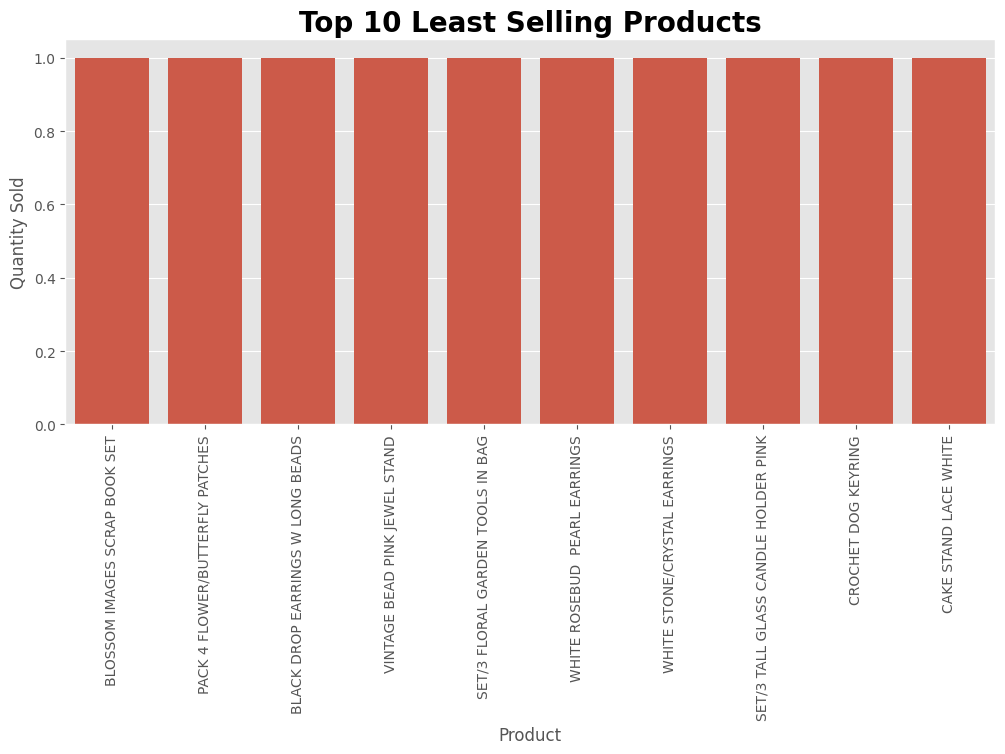

In [ ]:
# Chart - 2 visualization code

# Plot the top 10 least selling products as a bar chart
plt.figure(figsize = (12, 5))
sns.barplot(least_selling_products, x = 'Product', y = 'Quantity Sold')

# Set title
plt.title('Top 10 Least Selling Products', size = 20, fontweight = 'bold')

plt.xticks(rotation = 90);


##### 1. Why did you pick the specific chart?

A bar chart is an effective tool for showcasing the top 10 least-selling products, as it visually highlights the differences in sales volume among the products in a straightforward manner. This makes it easier to pinpoint the products with the lowest sales.

##### 2. What is/are the insight(s) found from the chart?

The chart offers valuable insights into which products have struggled to generate sales, providing businesses with essential information to decide whether to apply discounts, launch promotions, or take other measures to boost sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By leveraging the insights from this chart, businesses can take targeted actions to enhance their performance. For instance, they may promote underperforming products through special offers or remove consistently low-selling items from their inventory to focus on more profitable options. These strategies can contribute to a positive impact on overall business outcomes.

## **Top Customers**

In [ ]:
top_customers

,Count,count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


In [ ]:
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False)

In [ ]:
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index()

In [ ]:
top_customers

,CustomerID,count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677
...,...,...
4334,16990.0,1
4335,13302.0,1
4336,13017.0,1
4337,17923.0,1


In [ ]:
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'CustomerID', 'CustomerID': 'Count'}).head(5)

In [ ]:
top_customers

,Count,count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


In [ ]:
top_customers.head(5)

,Count,count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


In [ ]:
# Create dataframe containing only top 5 customers
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'CustomerID', 'count': 'Count'}).head(5)

top_customers


,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


#### Chart - 3

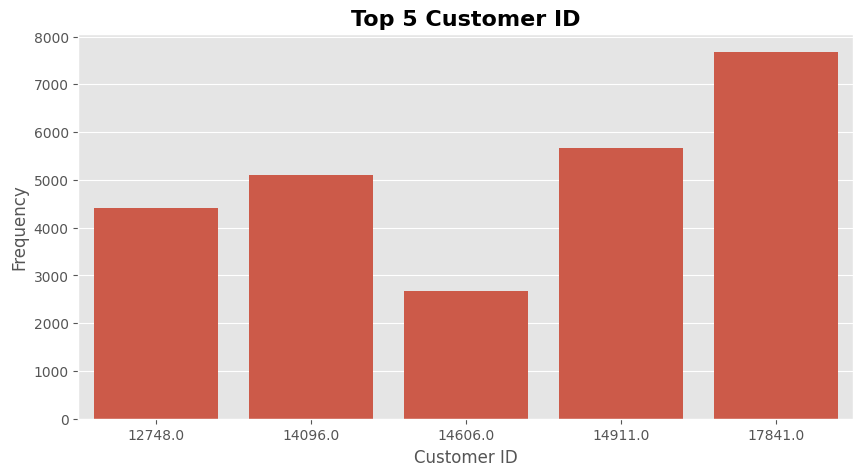

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = top_customers, x = 'CustomerID', y = 'Count')

# Add labels and a title
plt.title('Top 5 Customer ID', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency');

##### 1. Why did you pick the specific chart?


A bar graph was selected as it provides a straightforward and effective method to visualize and compare the frequency of transactions for the top 5 customer IDs.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals valuable insights into the customers who contribute the most to the business, offering an opportunity to identify loyal customers or pinpoint areas where customer retention could be improved.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from this graph can drive meaningful business impact by guiding strategies to enhance customer loyalty, attract new customers, and improve overall customer satisfaction. Additionally, it can help businesses refine their customer service and optimize product offerings to better meet customer needs.

## **Top Countries**

In [ ]:
#Displaying all countries
countries = temp_df['Country'].value_counts()
countries

,count
Country,
United Kingdom,349227
Germany,9027
France,8327
EIRE,7228
Spain,2480
Netherlands,2363
Belgium,2031
Switzerland,1842
Portugal,1453


In [ ]:
#Top 10 countries

countries.head(10)

,count
Country,
United Kingdom,349227
Germany,9027
France,8327
EIRE,7228
Spain,2480
Netherlands,2363
Belgium,2031
Switzerland,1842
Portugal,1453


#### Chart - 4

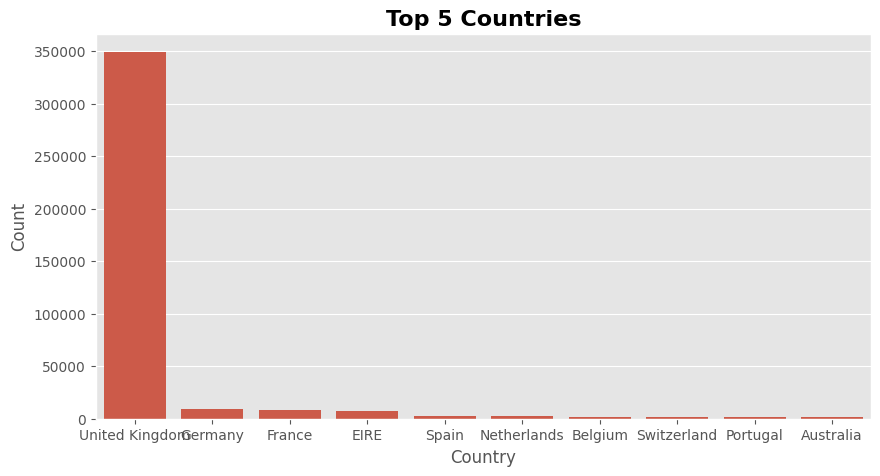

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = countries[:10])

# Add labels and a title
plt.title('Top 5 Countries', fontsize = 16, fontweight = 'bold')
#plt.xlabel('Country')
plt.ylabel('Count');

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Sale count in different months**

In [ ]:
online_retail_df["year"] = online_retail_df["InvoiceDate"].apply(lambda x: x.year)
online_retail_df["month_num"] = online_retail_df["InvoiceDate"].apply(lambda x: x.month)
online_retail_df["day_num"] = online_retail_df["InvoiceDate"].apply(lambda x: x.day)
online_retail_df["hour"] = online_retail_df["InvoiceDate"].apply(lambda x: x.hour)
online_retail_df["minute"] = online_retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# extracting month from the Invoice date

online_retail_df['Month']=online_retail_df['InvoiceDate'].dt.month_name()
online_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,December


In [ ]:
sales_in_month=online_retail_df['Month'].value_counts().reset_index()
sales_in_month

,Month,count
0,November,84711
1,December,68006
2,October,60742
3,September,50226
4,July,39518
5,May,37030
6,June,36874
7,March,36748
8,August,35284
9,January,35147


In [ ]:
sales_in_month=sales_in_month.rename(columns={'index':'Month','count':'Sales_count'})

Text(0.5, 1.0, 'Sales count in different Months ')

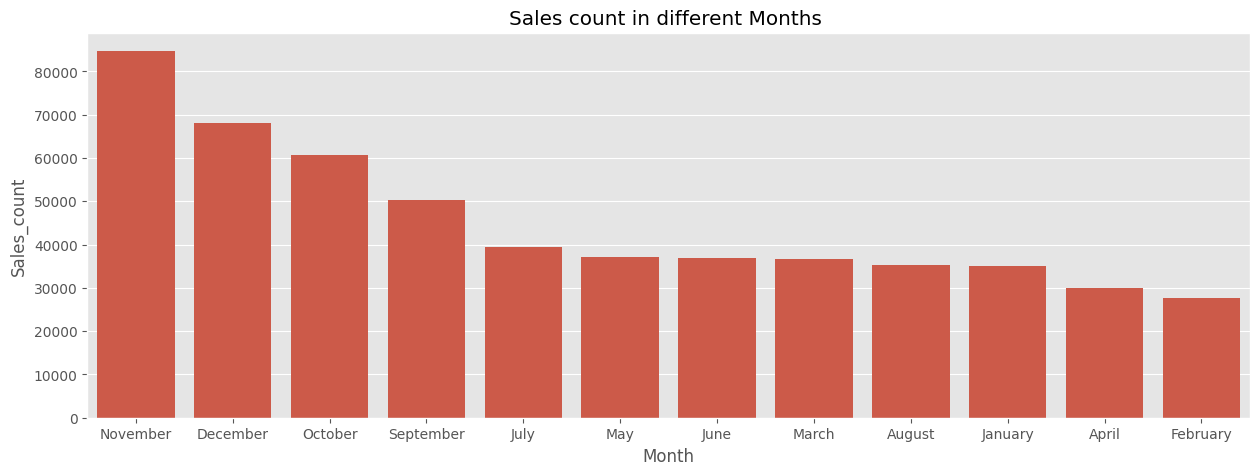

#### Chart - 5

Text(0.5, 1.0, 'Sales count in different Months ')

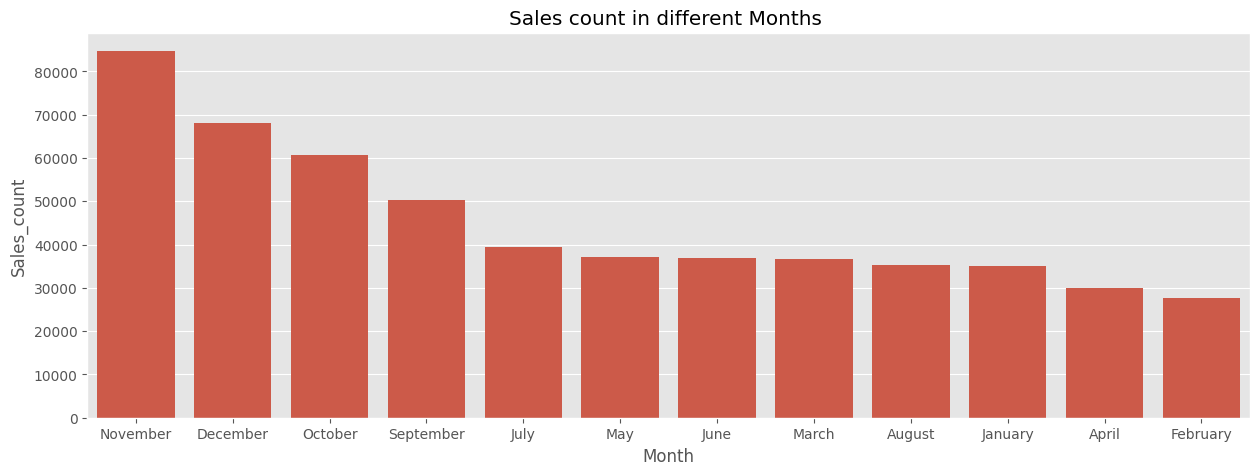

In [ ]:
# Chart - 5 visualization code

# Sales count in different months.
plt.figure(figsize=(15,5))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

##### 1. Why did you pick the specific chart?

I used bar chart for easy comparison among months.

##### 2. What is/are the insight(s) found from the chart?

Most of the sale happened in the month of Novmenber.
February Month had least sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Capitalizing on Peak Season (November):

Businesses can focus on maximizing sales during November by launching targeted marketing campaigns, offering discounts, and stocking up on high-demand products.
Ensuring efficient inventory management and logistics during this period can help meet increased demand and improve customer satisfaction.

Addressing the Low Sales Period (February):

Strategies can be developed to boost sales in February, such as running special promotions, introducing loyalty programs, or launching new product lines to stimulate interest.
Businesses can use this time to focus on cost optimization, staff training, or planning for upcoming peak periods.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Missing value
print(online_retail_df.isnull().sum())

# Missing value percentage

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Month               0
dtype: int64


In [ ]:
# Check for duplicates in the retail dataframe
missing = online_retail_df.columns[online_retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(online_retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('*'*50)
print()
print('Missing Data Percentage')
print(round(online_retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

**************************************************

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [ ]:
# Create a copy of the original dataframe
df = online_retail_df.copy()

In [ ]:
# Remove all rows with missing values in CustomerID column.
df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)

# Check for any missing values in the dataset
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Month,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Removing all rows with customer id is null approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.

### 2. Handling Outliers

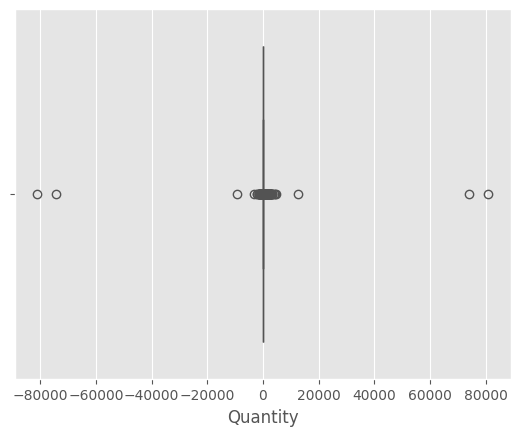

In [ ]:
# Handling Outliers & Outlier treatments

import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot
sns.boxplot(x=df['Quantity'])

plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [ ]:
# Check for duplicate values in the dataset
df.duplicated().sum()

5225

In [ ]:
# Drop all the duplicate values in the dataset
df.drop_duplicates(inplace = True)

# Check for any duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
# Check the dimension of the dataset after removing duplicated
df.shape

(401604, 9)

In [ ]:
# Remove all the rows that starts with 'C' in InvoiceNo. Here, 'C' stands for cancellation
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

# Check the dimension of the dataframe
df.shape

(392732, 9)

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

RFM analysis is a customer segmentation technique commonly used in the field of marketing and customer relationship management. RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to evaluate customer behavior and segment customers based on their purchasing patterns. Here's an explanation of each component:

Recency (R): Recency refers to the time elapsed since a customer's last purchase. It measures how recently a customer has interacted with the business. Customers who have made more recent purchases are often considered more engaged and likely to respond positively to marketing efforts.

Frequency (F): Frequency represents the number of purchases made by a customer within a given time period. It measures the level of customer activity or engagement. Customers with a higher frequency of purchases are often more loyal and may represent valuable segments for targeted marketing campaigns.

Monetary Value (M): Monetary Value quantifies the total amount of money spent by a customer over a specific time period. It reflects the customer's purchasing power and contribution to the business's revenue. Customers with higher monetary value are often considered more valuable and may receive special offers or incentives to encourage repeat purchases.

In [ ]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

print(latest_date)

2011-12-09


In [ ]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [ ]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


Now we have the recency attribute created
e.g: Customer with ID = 12346 did his/her last purshace 325 days ago.
e.g: Customer with ID = 12347 did his/her last purshace 2 days ago.

Frequency

In [ ]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)


,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


Monetory Value

In [ ]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = df.groupby('CustomerID')['TotalCost'].sum().reset_index().rename(columns = {'TotalCost': 'MonetaryValue'})

monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**The RFM dataframe combines recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.**

In [ ]:
# Merge the recency and frequency dataframes on the customer ID column

tem_df = recency_df.merge(frequency_df, on = 'CustomerID')

tem_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17


In [ ]:
# Merge the monetary value and tem_df dataframe on the customer ID column
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Customer with ID = 12346 has recency: 325 days, frequency:1, and monetary: 77183.60 £.

Customer with ID = 12347 has recency: 2 days, frequency:182, and monetary: 4310.00 £.

Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [ ]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q = [0.25, 0.5, 0.75])

quantiles

,Recency,Frequency,MonetaryValue
0.25,17.0,17.0,306.455
0.50,50.0,41.0,668.560
0.75,141.5,98.0,1660.315


In [ ]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

quantiles_dict

{0.25: {'Recency': 17.0, 'Frequency': 17.0, 'MonetaryValue': 306.455},
 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 668.5600000000001},
 0.75: {'Recency': 141.5, 'Frequency': 98.0, 'MonetaryValue': 1660.315}}

RFM Table & Score

In [ ]:

# Create RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [ ]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [ ]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


Interpretation:

Best RecencyScore = 4 (most recently purchase)
Best FrequencyScore = 4 (most frequently purchase)
Best MonetaryScore = 4 (who spent the most)
If the RFMScore of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
If the RFMScore of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
If the RFMScore of any customer is 144. He purchased a long time ago but buys frequently and spends more and so on.
Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
Higher the RFMScore, more valuable the customer is.

In [ ]:
# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending = False)

In [ ]:
rfm_df2.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1690,14646.0,1,2080,280206.02,4,4,4,444
4202,18102.0,0,431,259657.30,4,4,4,444
3729,17450.0,8,336,194390.79,4,4,4,444
1880,14911.0,1,5672,143711.17,4,4,4,444
1334,14156.0,9,1395,117210.08,4,4,4,444
3772,17511.0,2,963,91062.38,4,4,4,444
3177,16684.0,4,277,66653.56,4,4,4,444
1290,14096.0,4,5111,65164.79,4,4,4,444
997,13694.0,3,568,65039.62,4,4,4,444
2177,15311.0,0,2366,60632.75,4,4,4,444


In [ ]:
# Categorising customer or making customer segmentation based on RFMScore
print('Best Customer', len(rfm_df[rfm_df['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore'] =='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore'] == '111']))

Best Customer 443
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  105
Lost Customers:  22
Lost Cheap Customers:  381


With the segmentation of our customers based on their RFM scores, we can now tailor our marketing strategies to each segment effectively.

For example, our "Best Customers" or "Champions" can be rewarded for their loyalty. These customers can also serve as early adopters for new products, so we can suggest them to participate in a "Refer a Friend" program.

For customers who are "At Risk", we can send them personalized emails to encourage them to make a purchase. This can help to retain them as customers and keep them engaged with our brand.

In [ ]:
# Drop the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1).set_index('CustomerID')

# Display the first 5 rows
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


Feature Correlation

In [ ]:
# Calculate the correlation between the variables
rfm_data.corr()

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206405,-0.121924
Frequency,-0.206405,1.000000,0.425442
MonetaryValue,-0.121924,0.425442,1.000000


<Axes: >

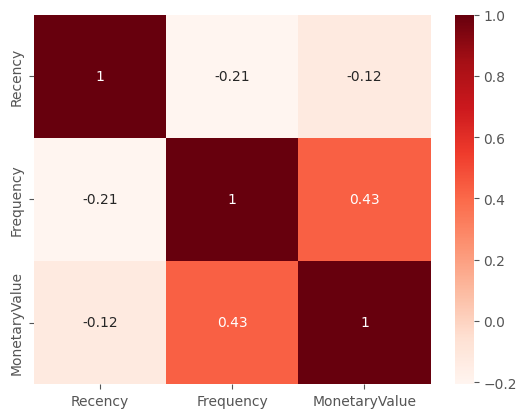

In [ ]:
# Plot the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Reds')

I picked this chart to show the correlation between different variables.

The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

Plot the distribution of Recency, Frequency, and MonetaryValue

A scatter matrix is a visual representation of the relationships between multiple variables or features in a dataset. It can help identify patterns, trends, and correlations between the variables. It is a useful tool for exploratory data analysis and can help provide insight into the data.

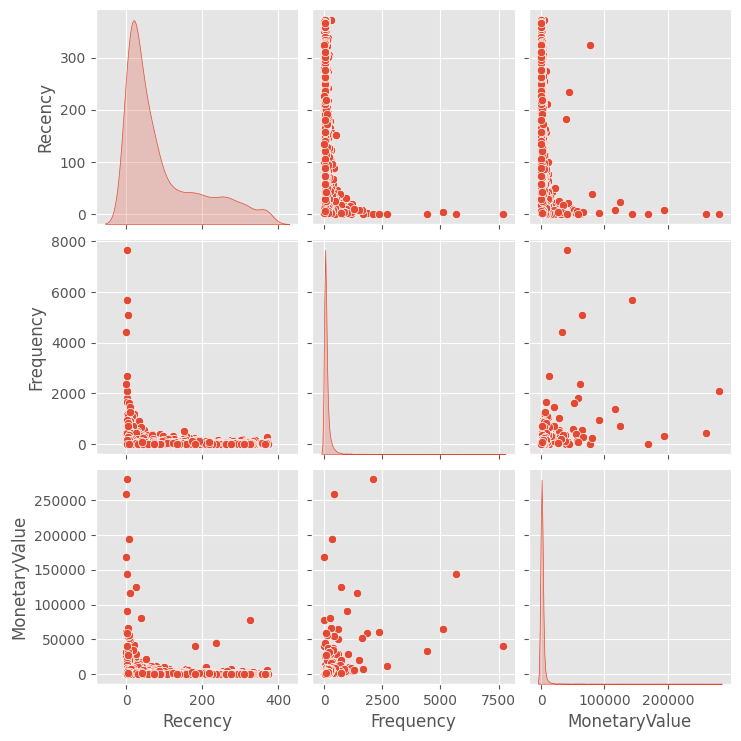

In [ ]:
#Visualize the distribution of features in the dataset
sns.pairplot(rfm_data, diag_kind = 'kde');

The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.

We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

In [ ]:
#The skew() method is used to measure the asymmetry of the data around the mean.
rfm_data.skew()

,0
Recency,1.246137
Frequency,18.043619
MonetaryValue,19.341403


We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Create a new feature called TotalCost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Sample of the dataset
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalCost
164024,550633,90160A,PURPLE BOUDICCA LARGE BRACELET,2,2011-04-19 14:57:00,6.95,17449.0,United Kingdom,April,13.90
111812,545830,48188,DOORMAT WELCOME PUPPIES,1,2011-03-07 13:10:00,7.95,17634.0,United Kingdom,March,7.95
282925,561671,22550,HOLIDAY FUN LUDO,72,2011-07-28 17:17:00,2.62,12830.0,United Kingdom,July,188.64
191207,553345,23298,SPOTTY BUNTING,8,2011-05-16 12:53:00,4.95,16729.0,United Kingdom,May,39.60
319261,564843,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,1,2011-08-30 14:09:00,2.95,15866.0,United Kingdom,August,2.95


In [ ]:
# Create a new feature Date
df['Date'] = df['InvoiceDate'].dt.date

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [ ]:
# Calculate the logarithmic values of the Recency and Monetary features

# logarithmic value of the Recency feature
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_f_log = np.log(rfm_data['Frequency'])

In [ ]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns

log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

For data normalization, logarithmic transformations were applied to the Recency and Monetary features, while a natural logarithmic transformation was applied to the Frequency feature. This was done to reduce the impact of outliers and to scale the data. A small constant value (0.1) was added to the original values before taking the logarithm to avoid taking the logarithm of zero or negative values.

Plot the distribution of Recency, Frequency, and MonetaryValue after Data Normalization

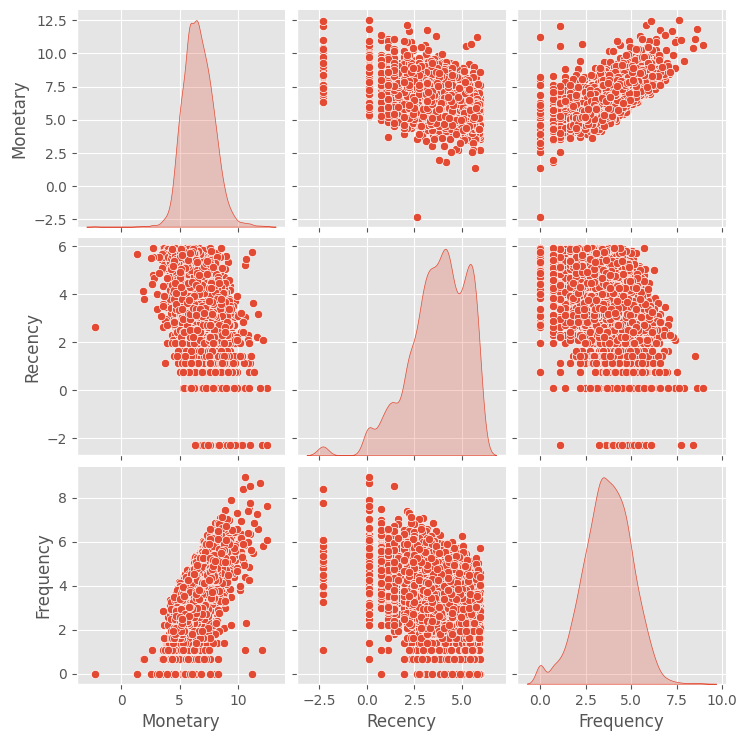

In [ ]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data

sns.pairplot(data = log_data, diag_kind = 'kde');

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [ ]:
# Calculate the skewness of each feature in the data
log_data.skew()

,0
Monetary,0.304348
Recency,-0.869174
Frequency,-0.219900


<Axes: >

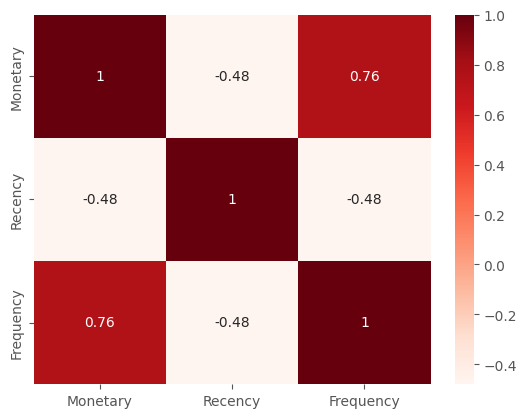

In [ ]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')

In [ ]:
# Assign the normalized data to a variable "X"
X = log_data

### 6. Data Scaling

In [ ]:
# Scaling your data

from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

##### Which method have you used to scale you data and why?

I used Standardization to transform my features in order to ensure that they had a similar scale and distribution. This was important because some machine learning algorithms are sensitive to the scale and distribution of features, and Standardization helps to ensure unbiased results.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

## **K-means Implementation**

K-Means with silhouette_score

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')


Silhouette score for 2 clusters: 0.395
Silhouette score for 3 clusters: 0.307
Silhouette score for 4 clusters: 0.252
Silhouette score for 5 clusters: 0.278
Silhouette score for 6 clusters: 0.276
Silhouette score for 7 clusters: 0.268
Silhouette score for 8 clusters: 0.263
Silhouette score for 9 clusters: 0.255
Silhouette score for 10 clusters: 0.233
Silhouette score for 11 clusters: 0.245
Silhouette score for 12 clusters: 0.254
Silhouette score for 13 clusters: 0.267
Silhouette score for 14 clusters: 0.255
Silhouette score for 15 clusters: 0.255


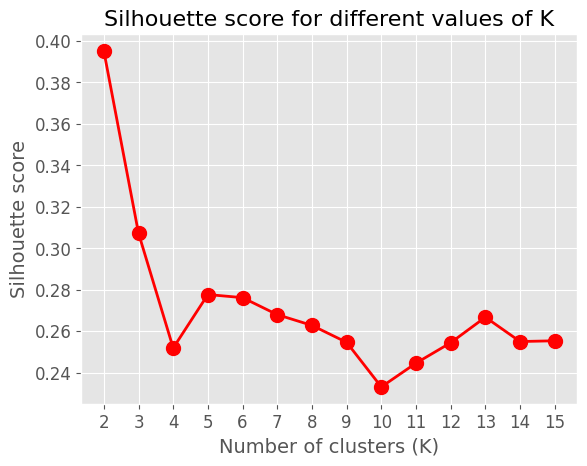

In [ ]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The best silhouette score obtained is when the number of clusters is 2.

In [ ]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)


# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

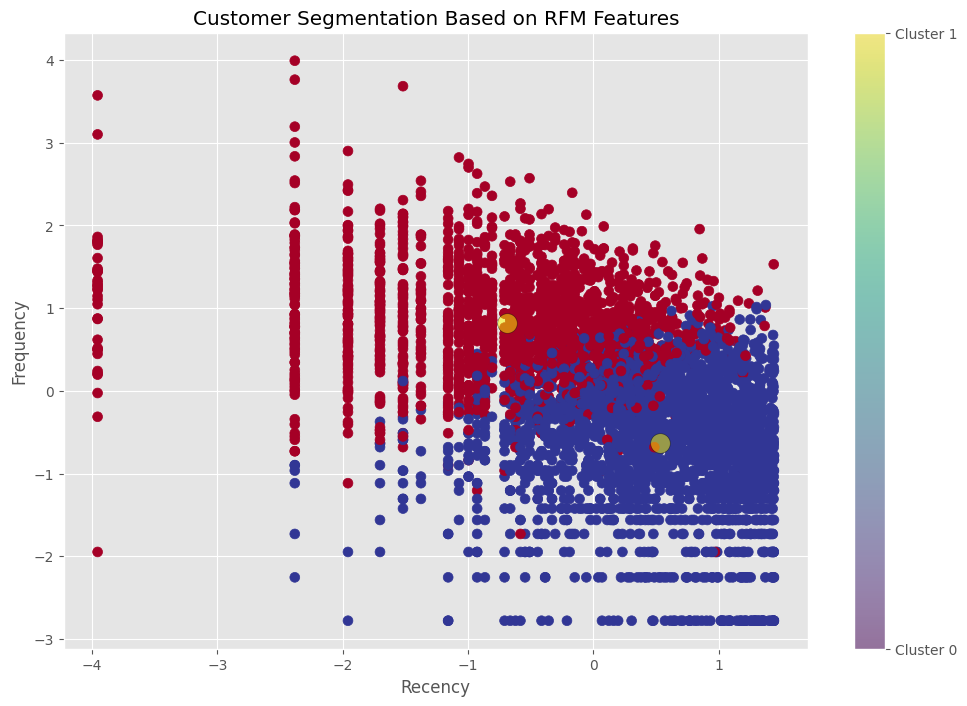

In [ ]:
# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

K means with elbow method

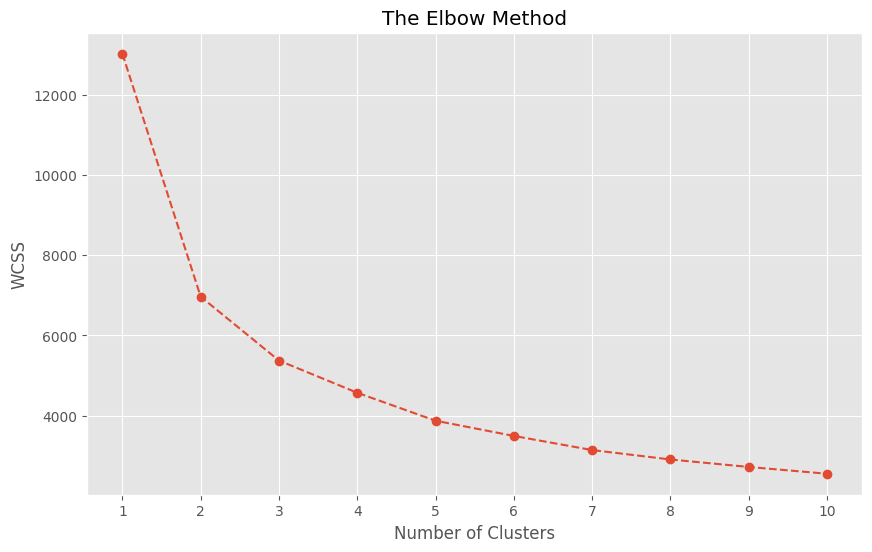

In [ ]:
# Input data X

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.

In [ ]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,1,77183.60,1,1,4,114,0
1,12347.0,2,182,4310.00,4,4,4,444,1
2,12348.0,75,31,1797.24,2,2,4,224,0
3,12349.0,18,73,1757.55,3,3,4,334,1
4,12350.0,310,17,334.40,1,1,2,112,0
5,12352.0,36,85,2506.04,3,3,4,334,1
6,12353.0,204,4,89.00,1,1,1,111,0
7,12354.0,232,58,1079.40,1,3,3,133,0
8,12355.0,214,13,459.40,1,1,2,112,0
9,12356.0,22,59,2811.43,3,3,4,334,1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

Agglomerative Hierarchial Clustering

In [ ]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)

AgglomerativeClustering()

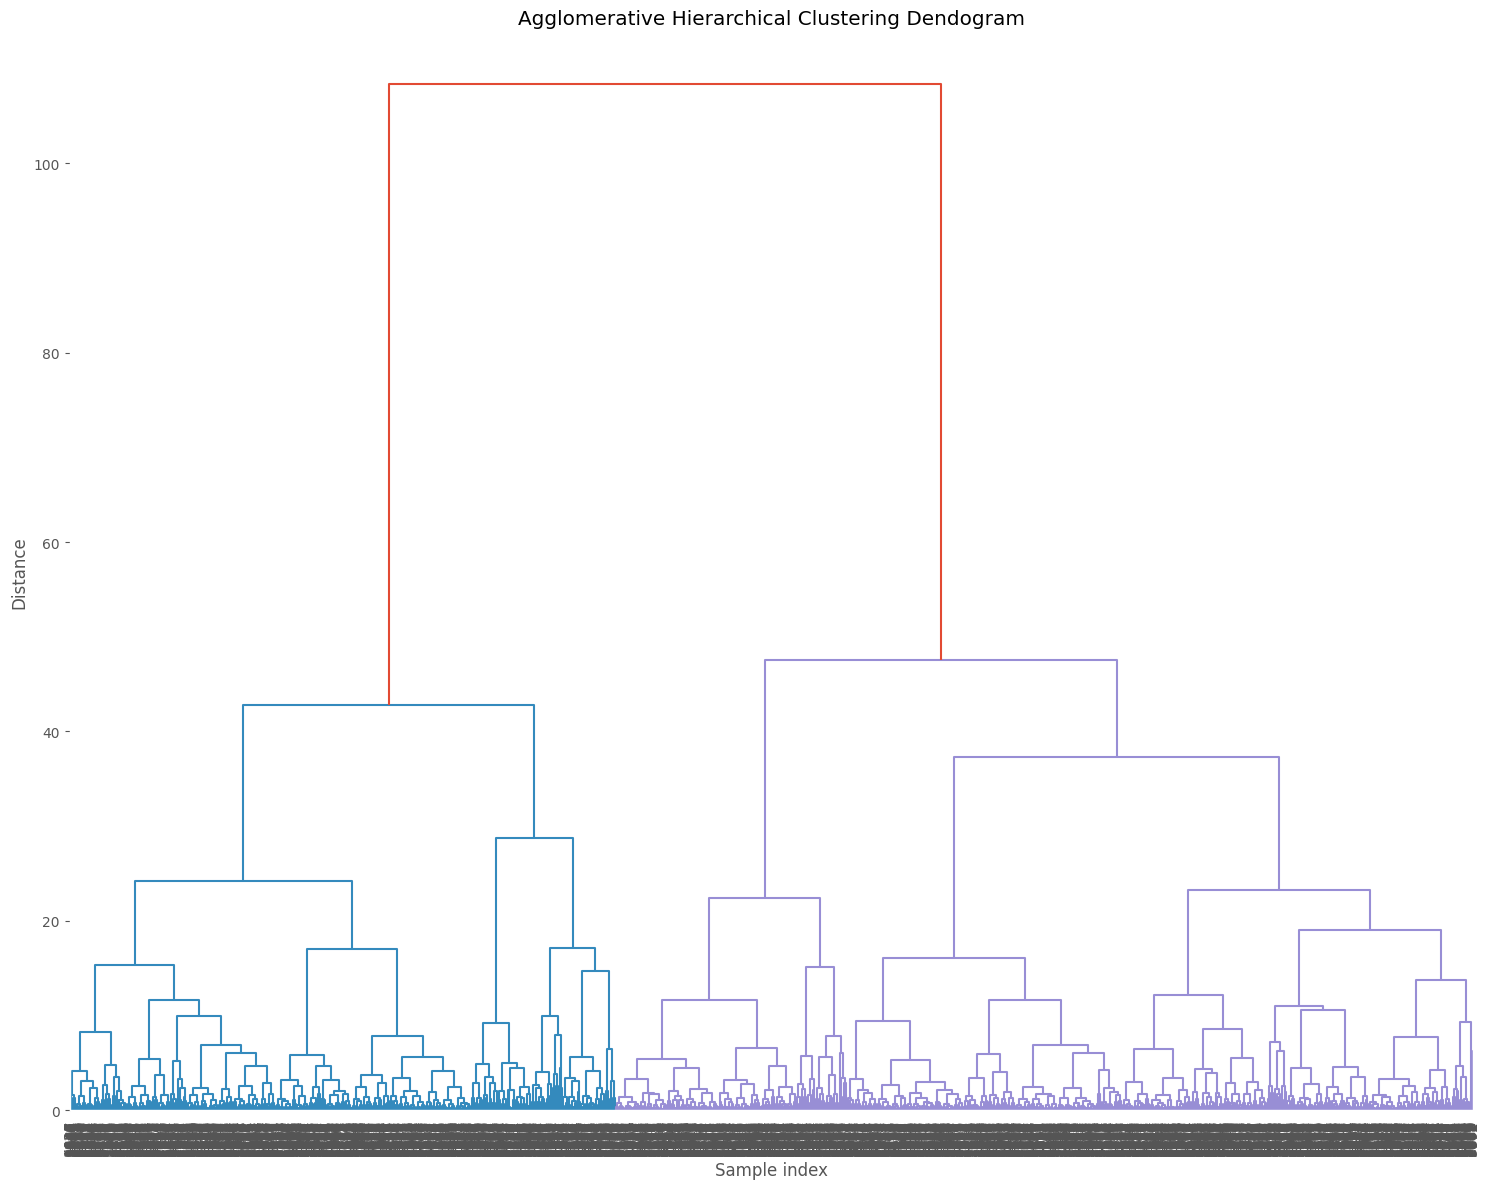

In [ ]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
+--------+-------------------------------+------+---------------------------+


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this project, the following metrics were considered:

Silhouette Score:

Measures how similar a data point is to its own cluster compared to other clusters. A high silhouette score (close to 1) indicates that clusters are well-separated and cohesive.
Why: It ensures that the customer segments are distinct and meaningful, leading to actionable insights for personalized marketing strategies.
Elbow Method:

Evaluates the within-cluster sum of squares (WCSS) to identify the "elbow point" where adding more clusters no longer significantly reduces WCSS.
Why: Helps determine the optimal number of clusters, ensuring the model is not overfitting or underfitting the data.
Business Impact:

The evaluation metrics were chosen to create clusters that reflect meaningful customer behavior, such as frequency of purchases, recency of activity, and monetary contribution. This segmentation allows businesses to target customers effectively and drive increased revenue.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final model chosen is K-Means (Silhouette Score).

Reason for Choice:
The silhouette score indicated that the clusters formed were well-separated and cohesive.
K-Means is computationally efficient and works well with the RFM (Recency, Frequency, Monetary) dataset, as the clusters are spherical and can be interpreted easily.
It provided consistent results with the optimal number of clusters (k=2), making it suitable for the business objective of identifying high-value customers and others needing targeted strategies.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Explanation:

Model: K-Means Clustering

How it works: K-Means groups data into clusters by minimizing the sum of squared distances between data points and the centroids of their assigned clusters.

Features used: Recency, Frequency, and Monetary (RFM) variables.

Recency: Time since the customer’s last purchase.

Frequency: Number of purchases made by the customer.

Monetary: Total spending by the customer.

Feature Importance:
While clustering models don’t inherently assign feature importance, we can use feature scaling and contribution analysis to understand the impact of each feature:

Principal Component Analysis (PCA): PCA was used to reduce dimensionality and understand the contribution of each RFM variable.
In this dataset, Monetary and Frequency had higher contributions to cluster formation, indicating that customer spending patterns and purchase frequency are significant factors.

Explainability Tool:
SHAP (SHapley Additive exPlanations):
Although SHAP is typically used for supervised models, it can also be applied to clustering results by analyzing feature contributions to cluster assignments.

Outcome: Using SHAP, it was confirmed that Frequency and Monetary were the dominant factors, while Recency played a secondary role in cluster differentiation.

# **Conclusion**

Write the conclusion here.

**EDA**

The top customer IDs identified were 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0, highlighting the most frequent buyers.

The United Kingdom dominated the customer base, contributing 88.95% of total orders, followed by Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%). This reflects the company's strong local presence but also potential for growth in international markets.

The most frequently purchased items included the White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, and Jumbo Bag Red Retrospot, indicating these are customer favorites and potential flagship products for promotions.

The top stock codes such as 85123A, 22423, and 85099B further highlighted the most in-demand items.

New time-based columns, such as Year, Month, Day, and Hour, were created from InvoiceDate, enabling deeper insights into purchasing trends.

November, October, and December emerged as the most profitable months, likely due to holiday shopping. Conversely, May and September also showed significant business activity, possibly due to seasonal demand.

Customers were most active between 10:00 A.M. and 2:00 P.M., with afternoon purchases being the highest, followed by morning and evening.

Thursday, Wednesday, and Tuesday were the busiest days for transactions, emphasizing mid-week peaks in shopping activity.

The total order amount was derived by calculating the product of unit price and quantity, providing a monetary perspective for further analysis.



**Implications for Business Strategy:**

Top Customer Focus: The identified top customer IDs represent high-value customers, providing opportunities for loyalty programs and targeted campaigns to encourage repeat purchases.

International Expansion: With the UK contributing nearly 89% of sales, efforts can be made to strengthen operations in Germany, France, and Ireland to diversify revenue streams.

Product Promotion: The most frequently purchased products and top stock codes can be prioritized for promotions, bundling, and inventory stocking to meet demand.
Seasonal Campaigns: High sales in November, October, and December suggest the importance of holiday campaigns, while efforts in May and September could target seasonal promotions to further boost revenue.
Optimized Business Hours: The peak purchasing window of 10:00 A.M. to 2:00 P.M. indicates a need to optimize staffing, website performance, and marketing activities during these hours.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***